In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

STATEMENT OF PROBLEM:PREDICTION IF A TRANSACTION IS LEGIT OR A FAUD TRANSACTION

In [ ]:
#loading the datasets to a panda dataframe
df = pd.read_csv('creditcard.csv')
df
#credit_card head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
#to get the last five rows of the dataset
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
174413,121903.0,1.990377,0.576967,-2.161558,1.565511,0.890954,-1.151209,0.744936,-0.405884,-0.025157,...,-0.000921,0.226565,0.037975,0.986244,0.457002,-0.548521,0.003262,-0.015389,15.16,0.0
174414,121904.0,-0.178485,1.005425,0.189683,0.982715,1.276487,-0.912374,1.519071,-0.510492,-0.543448,...,0.083795,0.700306,-0.288574,-0.013359,0.024066,-0.403059,0.269842,0.025008,12.96,0.0
174415,121905.0,2.040762,-0.652335,-1.961113,-0.501931,0.700651,0.650734,-0.080058,-0.004127,-0.853303,...,-0.263335,-0.001320,0.212526,-0.297720,-0.051514,0.670807,-0.024880,-0.073672,28.00,0.0
174416,121905.0,0.127436,0.091596,0.735793,-1.298233,-0.494486,0.365601,0.529362,-0.372069,-0.603677,...,-0.462415,-0.580971,0.342880,0.465106,-1.814987,0.074088,-0.095239,0.026431,100.00,0.0
174417,121905.0,1.643135,-0.708018,-2.137782,0.305304,0.270101,-0.188758,0.104842,0.033299,0.961903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#dataset informations

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174418 entries, 0 to 174417
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    174418 non-null  float64
 1   V1      174418 non-null  float64
 2   V2      174418 non-null  float64
 3   V3      174418 non-null  float64
 4   V4      174418 non-null  float64
 5   V5      174418 non-null  float64
 6   V6      174418 non-null  float64
 7   V7      174418 non-null  float64
 8   V8      174418 non-null  float64
 9   V9      174418 non-null  float64
 10  V10     174418 non-null  float64
 11  V11     174418 non-null  float64
 12  V12     174418 non-null  float64
 13  V13     174418 non-null  float64
 14  V14     174418 non-null  float64
 15  V15     174418 non-null  float64
 16  V16     174417 non-null  float64
 17  V17     174417 non-null  float64
 18  V18     174417 non-null  float64
 19  V19     174417 non-null  float64
 20  V20     174417 non-null  float64
 21  V21     17

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,174418.000000,174418.000000,174418.000000,174418.000000,174418.000000,174418.000000,174418.000000,174418.000000,174418.000000,174418.000000,...,174417.000000,174417.000000,174417.000000,174417.000000,174417.000000,174417.000000,174417.000000,174417.000000,174417.000000,174417.000000
mean,62309.128960,-0.160089,0.033801,0.467976,0.108257,-0.168597,0.056659,-0.077597,0.030286,0.017562,...,-0.026170,-0.078105,-0.021393,0.008374,0.087731,0.011644,0.002297,0.002355,87.661128,0.002070
std,28816.228452,1.862290,1.611586,1.396594,1.375546,1.348070,1.299025,1.212533,1.227053,1.149611,...,0.742064,0.671017,0.590521,0.599656,0.468813,0.490175,0.392214,0.306982,246.376800,0.045448
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,41576.000000,-0.982993,-0.547432,-0.099398,-0.755413,-0.824215,-0.693705,-0.585956,-0.165312,-0.660238,...,-0.230094,-0.545300,-0.169842,-0.333755,-0.202627,-0.330559,-0.065244,-0.030006,5.490000,0.000000
50%,61581.000000,-0.167266,0.103971,0.606110,0.114749,-0.219636,-0.205162,-0.030075,0.054366,-0.078793,...,-0.052796,-0.062028,-0.035103,0.058665,0.131231,-0.059333,0.008308,0.020809,22.000000,0.000000
75%,79436.000000,1.188791,0.799261,1.287774,0.928659,0.386359,0.447315,0.466925,0.349039,0.638656,...,0.131567,0.372130,0.101343,0.416715,0.397273,0.271371,0.089692,0.078238,77.350000,0.000000
max,121905.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
#checking the number of missing values in each columns
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174413,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
174414,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
174415,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
174416,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#checking the number of missing values in each column
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

we have a few missing values in V16 -V28,Amount,Class.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


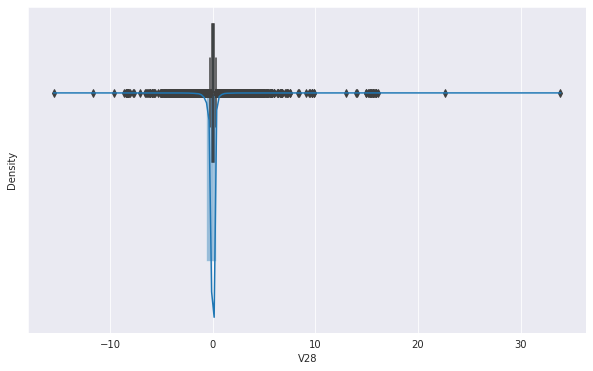

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(df.V28)
sns.distplot(df.V28)

In [ ]:
#replace missing value with mode

In [ ]:
df.fillna(df.mode())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
#distribution of legit transaction
df['Class'].value_counts()

0.0    174056
1.0       361
Name: Class, dtype: int64

The Dataset is unbalanced
0.0 -> Normal transaction
1 -> fraudulent transactions

In [ ]:
#seperating the fraudlant and non-fraudlant transaction for analysis
legit_transaction = df[df.Class==0]
fraud =df[df.Class==1]

In [ ]:
print(legit_transaction)

            Time        V1        V2        V3        V4        V5        V6  \
0            0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1            0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2            1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3            1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4            2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...          ...       ...       ...       ...       ...       ...       ...   
174412  121902.0 -1.477285  0.591318  1.396755 -1.549721 -0.035484  1.032070   
174413  121903.0  1.990377  0.576967 -2.161558  1.565511  0.890954 -1.151209   
174414  121904.0 -0.178485  1.005425  0.189683  0.982715  1.276487 -0.912374   
174415  121905.0  2.040762 -0.652335 -1.961113 -0.501931  0.700651  0.650734   
174416  121905.0  0.127436  0.091596  0.735793 -1.298233 -0.494486  0.365601   

              V7        V8        V9  .

In [ ]:
print(fraud)

            Time        V1        V2        V3        V4        V5        V6  \
541        406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623        472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920      4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108      6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329      7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
...          ...       ...       ...       ...       ...       ...       ...   
163149  115691.0 -1.550273  1.088689 -2.393388  1.008733 -1.087562 -1.104602   
163586  116067.0  0.949241  1.333519 -4.855402  1.835006 -1.053245 -2.562826   
167184  118532.0 -5.961457  5.313382 -6.674320  6.028975 -1.387560  0.670638   
167305  118603.0 -6.677212  5.529299 -7.193275  6.081321 -1.636071  0.500610   
172787  121238.0 -2.628922  2.275636 -3.745369  1.226948 -1.132966 -1.256353   

              V7        V8        V9  .

In [ ]:
print(legit_transaction.shape)
print(fraud.shape)

(174056, 31)
(361, 31)


In [ ]:
#statistical measures of the data
legit_transaction.Amount.describe()

count    174056.000000
mean         87.611336
std         246.413576
min           0.000000
25%           5.510000
50%          22.000000
75%          77.150000
max       19656.530000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     361.000000
mean      111.668255
std       226.999987
min         0.000000
25%         1.000000
50%        11.390000
75%       104.030000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
#compare the values for both transaction
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,62320.153859,-0.147951,0.024747,0.485481,0.098361,-0.159908,0.059756,-0.063236,0.028806,0.023526,...,0.028380,-0.027870,-0.078221,-0.021358,0.008547,0.087746,0.011587,0.001923,0.002251,87.611336
1.0,56828.393352,-6.017345,4.401022,-7.964850,4.879033,-4.358999,-1.436327,-7.002469,0.743980,-2.860608,...,0.404407,0.793385,-0.022341,-0.038188,-0.074905,0.080347,0.039155,0.182589,0.052513,111.668255


SAMPLING

Build a sample dataset containing similar distribution of normal transaction and Fraudlant transaction.

Number of legit transcation -->174056
Number of Fraudlant transaction -->361

In [ ]:
legit_sample = legit_transaction.sample(n=344)

In [ ]:
#concatenating two dataframes

new_data = pd.concat((legit_sample, fraud), axis=0)

In [ ]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
23443,32761.0,-1.498094,-0.340093,1.644188,0.999991,-1.836000,-0.018303,-0.526344,0.378439,-0.562891,...,-0.452296,-0.680394,-0.153391,0.699598,-0.307000,-0.432799,-0.252824,-0.069941,139.38,0.0
49074,43898.0,-2.467305,-2.421027,2.004776,-2.011484,0.102353,0.494577,-0.501700,-0.287478,-1.017101,...,-0.438777,0.502473,0.424078,-0.248001,0.223008,-0.281668,-0.847882,0.259256,42.35,0.0
155829,106505.0,1.986309,-0.441573,-1.618050,-0.599812,1.908485,3.739808,-1.183073,0.929098,2.442794,...,-0.269837,-0.507766,0.403008,0.583167,-0.350982,-0.942226,0.052167,-0.039570,2.12,0.0
80625,58575.0,1.187246,-0.061892,-0.349676,0.907332,0.619270,1.109300,-0.109226,0.297553,0.317297,...,-0.159235,-0.368525,-0.300301,-1.731954,0.814651,-0.221771,0.021107,-0.009230,37.00,0.0
69993,53664.0,-1.857836,0.833759,0.806041,-0.923552,-1.527868,0.509249,-0.290149,1.029285,0.567566,...,0.035945,0.179769,0.260915,0.086939,-0.969597,0.648165,-0.331990,0.106441,115.36,0.0


In [ ]:
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
163149,115691.0,-1.550273,1.088689,-2.393388,1.008733,-1.087562,-1.104602,-2.670503,0.147655,-0.978626,...,0.802316,1.037105,0.095815,-0.320191,-0.080731,0.091012,0.024928,-0.077820,17.06,1.0
163586,116067.0,0.949241,1.333519,-4.855402,1.835006,-1.053245,-2.562826,-2.286986,0.260906,-0.895366,...,0.306598,-0.854627,0.101177,-0.281497,0.024444,-0.107944,0.625289,0.315677,65.00,1.0
167184,118532.0,-5.961457,5.313382,-6.674320,6.028975,-1.387560,0.670638,-4.128987,-4.765894,-1.005259,...,5.556642,-1.501808,1.355172,0.141093,0.077913,0.473988,0.287129,1.468653,105.89,1.0
167305,118603.0,-6.677212,5.529299,-7.193275,6.081321,-1.636071,0.500610,-4.640770,-4.339840,-0.950036,...,5.563301,-1.608272,0.965322,0.163718,0.047531,0.466165,0.278547,1.471988,105.89,1.0
172787,121238.0,-2.628922,2.275636,-3.745369,1.226948,-1.132966,-1.256353,-1.752420,0.281736,-1.792343,...,0.870730,1.269473,-0.265494,-0.480549,0.169665,0.096081,0.070036,0.063768,144.62,1.0


In [ ]:
new_data['Class'].value_counts()

1.0    361
0.0    344
Name: Class, dtype: int64

In [ ]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,64063.156977,-0.085132,-0.017082,0.285663,0.022909,-0.108938,0.215313,-0.204888,0.114737,-0.033985,...,0.029844,-0.047122,-0.050432,-0.021669,0.006653,0.129327,0.018469,0.001865,0.008991,82.990523
1.0,56828.393352,-6.017345,4.401022,-7.964850,4.879033,-4.358999,-1.436327,-7.002469,0.743980,-2.860608,...,0.404407,0.793385,-0.022341,-0.038188,-0.074905,0.080347,0.039155,0.182589,0.052513,111.668255


Splitting the data into features and Targets

In [ ]:
x = new_data.drop(columns = 'Class',axis = 1)
y = new_data ['Class']

In [ ]:
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
23443    32761.0 -1.498094 -0.340093  1.644188  0.999991 -1.836000 -0.018303   
49074    43898.0 -2.467305 -2.421027  2.004776 -2.011484  0.102353  0.494577   
155829  106505.0  1.986309 -0.441573 -1.618050 -0.599812  1.908485  3.739808   
80625    58575.0  1.187246 -0.061892 -0.349676  0.907332  0.619270  1.109300   
69993    53664.0 -1.857836  0.833759  0.806041 -0.923552 -1.527868  0.509249   
...          ...       ...       ...       ...       ...       ...       ...   
163149  115691.0 -1.550273  1.088689 -2.393388  1.008733 -1.087562 -1.104602   
163586  116067.0  0.949241  1.333519 -4.855402  1.835006 -1.053245 -2.562826   
167184  118532.0 -5.961457  5.313382 -6.674320  6.028975 -1.387560  0.670638   
167305  118603.0 -6.677212  5.529299 -7.193275  6.081321 -1.636071  0.500610   
172787  121238.0 -2.628922  2.275636 -3.745369  1.226948 -1.132966 -1.256353   

              V7        V8        V9  .

In [ ]:
print(y)

23443     0.0
49074     0.0
155829    0.0
80625     0.0
69993     0.0
         ... 
163149    1.0
163586    1.0
167184    1.0
167305    1.0
172787    1.0
Name: Class, Length: 705, dtype: float64


Splitting into training and testing

In [ ]:
x_train, x_test,y_train, y_test, = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2) 

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(705, 30) (564, 30) (141, 30)


Model Training

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
#training the logistic regression model with traing data
model.fit(x_train,y_train)

LogisticRegression()

Model Evaluation

Accuracy score

In [ ]:
#accuracy on training data

x_train_prediction = model.predict(x_train)
training_data_acccuracy = accuracy_score(x_train_prediction,y_train)

In [ ]:
print('Accuracy on Training data : ',training_data_acccuracy)

Accuracy on Training data :  0.9485815602836879


In [ ]:
#accuracy on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score (x_test_prediction,y_test)

In [ ]:
print('Accuracy score on Test Data :',test_data_accuracy)

Accuracy score on Test Data : 0.9645390070921985


The problem Statement of the above analysis is to predict the anomaly in Card transaction,so as to detect fraud in transactions I Splitted my data into two sets:fraud transaction and legit transactions for a better prediction.
For my charting and a better Visualization, I made use of a Subplot,displot and box showing card transaction anomaly density.


Findings
Fraud Transaction was discovered to be 174056\
Legit transaction to be 361



Recommendation: Absolute security measures should be made and put in place  at those times that most card transactions anolmalies were predicted or visualized using the Visualization graphs.